In [141]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
%matplotlib inline

In [167]:
df=pd.read_csv(r'C:\Users\\Desktop\marketing_data.csv')

In [168]:
df.rename({' Income ' : 'Income'}, axis = 1, inplace = True)
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype(float)

<ipython-input-168-2c2b4114c3e8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [132]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [155]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [133]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [172]:
df['Income'] = df['Income'].fillna(df['Income'].mean())#заменяем пропуски в столбце Income на среднее

In [173]:
df.shape

(2240, 28)

In [149]:
stat, p = shapiro(df['Income']) # тест Шапиро-Уилка
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Не отклоняем гипотезу о нормальности')
else:
    print('Не принимаем гипотезу о нормальности')

Statistics=0.777, p-value=0.000
Не принимаем гипотезу о нормальности


c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


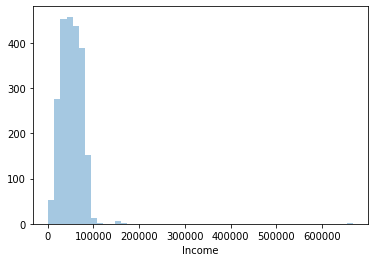

In [112]:
sns_plot = sns.distplot(df['Income'],kde=False)
fig = sns_plot.get_figure()

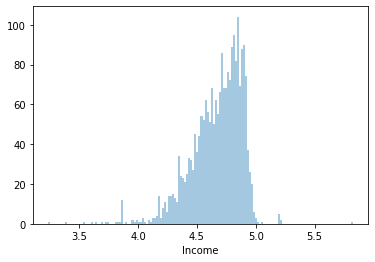

In [96]:
sns_plot = sns.distplot(np.log10(df['Income']),kde=False,bins=150)

In [117]:
stat, p = shapiro(np.log10(df['Income'])) # тест Шапиро-Уилка на логарифмированных данных
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Не отклоняем гипотезу о нормальности')
else:
    print('Не принимаем гипотезу о нормальности')

Statistics=0.923, p-value=0.000
Не принимаем гипотезу о нормальности


<AxesSubplot:>

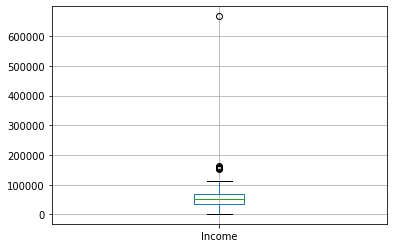

In [118]:
df.boxplot(column=['Income'])#ищем выбросы

In [151]:
df = df.drop(df[df.Income > 600000].index)

In [152]:
df.shape

(2239, 28)

c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


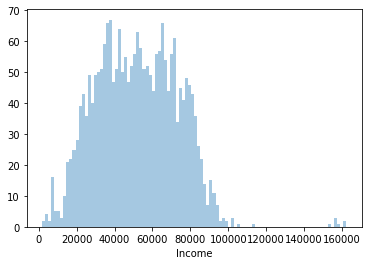

In [154]:
sns_plot = sns.distplot(df['Income'],kde=False,bins=100)
fig = sns_plot.get_figure()#мультимодальность

In [153]:
stat, p = shapiro(df['Income'])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Не отклоняем гипотезу о нормальности')
else:
    print('Не принимаем гипотезу о нормальности')

Statistics=0.976, p-value=0.000
Не принимаем гипотезу о нормальности


Удаление выброса и логарифмирование не помогло привести распределение к нормальному. Есть еще семьи с доходом больше 150 000, вытягивающие распределение вправо плюс мультимодальность.

Проверим гипотезу о том, что средний доход различается в зависимости от того есть (1) дети в семье или нет(0) 'Kidhome'.
Т.к. уже проверено, что доход распределен ненормально, то t тест ипользовать нежелательно. Переходим к непараметрическому аналогу-критерию Манна-Уитни.

In [159]:
x = df[df['Kidhome'] == 1]['Income']
y = df[df['Kidhome'] == 0]['Income']
x.name, y.name = 'yes_kids', 'no_kids'

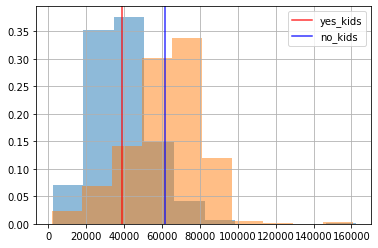

In [162]:
x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
plt.axvline(x.mean(), color='red', alpha=0.8)
plt.axvline(y.mean(), color='blue', alpha=0.8)
plt.legend([x.name, y.name])

Условно распределение в обоих выборках нормальное, но у переменной х есть выброс справа. Можно попробовать применить t-test. Затем применить непарметрический аналог, чтобы проверить выводы.

In [176]:
res_ttest = stats.ttest_ind(x, y, equal_var=False)
print(res_ttest)

Ttest_indResult(statistic=-30.188749090851537, pvalue=6.2998078380139725e-167)


p-value очень мал,гипотеза о равенстве средних не принимается. Доходы в семьях  с маленькими детьми и без отличаются. 
Теперь применим Манна-Уитни, чтобы убедиться что допущение о нормальности не исказило результаты теста.

In [163]:
res_mann = stats.mannwhitneyu(x, y)
print(res_mann)

MannwhitneyuResult(statistic=198021.5, pvalue=2.3077830246271226e-152)


Значение p-value также получилось незначительным. Значит, гипотеза о равенстве медиан не принимается. Вывод-в семьях,имеющих маленьких детей, и в семьях,не имеющих мал детей, доходы отличаются.

Попробуем разбить семьи на группы в зависимости от предпочтений в покупках (магазины, интернет и т.д.)(NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases). Ипользуем метод иерархического кластерного анализа.

In [182]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [183]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [228]:
df_cluster=df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5']]

In [229]:
df_cluster

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,0,0
2237,0,0,0,0,0
2238,0,0,0,0,0


In [224]:
# Объект, в котором будет хранится информация о последовательном слиянии кластеров
link = linkage(df_cluster, "ward",'euclidean')

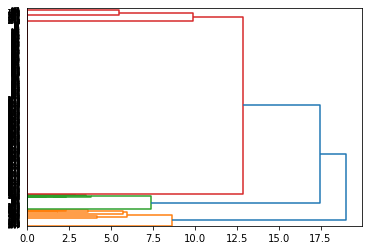

In [225]:
dn = dendrogram(link, orientation = "right")

In [232]:
# Останавливаем объединение при заданном числе кластеров - 3
df_cluster['cluster'] = fcluster(link, 3, criterion='maxclust')

<ipython-input-232-cc67225006b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = fcluster(link, 3, criterion='maxclust')


Теперь вычислим средние значения всех характеристик, сгруппировав данные по номеру кластера. Используем стандартную конструкцию: вызов метода groupby с последующим применением группирующей функции.

In [233]:
df_cluster.groupby('cluster').mean().round(1)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
cluster,,,,,
1,0.3,0.1,0.0,1.0,0.4
2,0.1,0.0,1.0,0.0,0.1
3,0.0,0.0,0.0,0.0,0.0


Таким образом, получилось 3 кластера:
- в 1 кластер попали семьи, где особенно эффективной была 4 маркетинговая кампания, однаком 1 и 5 тоже принесла результаты
- во 2 кластер попали семьи, где успешно прошла 3 маркетинговая кампания
- в 3 кластер вошли семьи, где ни одна маркетинговая кампания не принесла результатов